In [1]:
import importlib
import interpolate_spline
importlib.reload(interpolate_spline)

<module 'interpolate_spline' from '/home/florian/dev/github.com/thecodinglab/hm-scripts/sympy/interpolate_spline.py'>

In [2]:
import sympy as sp
from interpolate_spline import spline

data = sp.Matrix([
    [0, 2],
    [1, 1],
    [2, 2],
    [3, 2],
])

t = sp.Symbol('t')

splines = spline(data, t, degree=3, precision=4)

### Splines

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Conditions

#### Support points

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Continuity

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Continuity of derivatives

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Continuity of second derivatives

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Natural conditions

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Spline

<IPython.core.display.Math object>

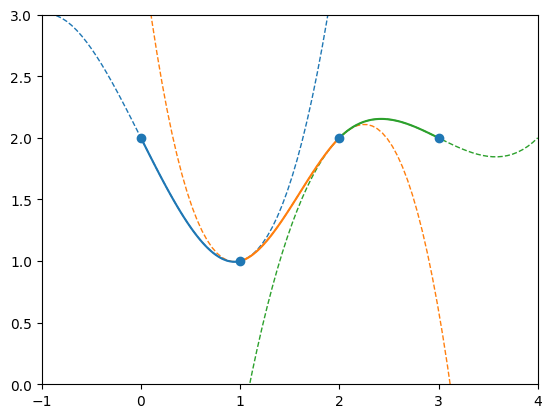

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

np_data = np.array(data).astype(np.float64)
data_x = np_data[:, 0]
data_y = np_data[:, 1]

slack = 1
min_x = np.min(data_x) - slack
max_x = np.max(data_x) + slack
min_y = np.min(data_y) - slack
max_y = np.max(data_y) + slack

total = np.linspace(min_x, max_x, 100)

ax = plt.gca()
ax.autoscale(False)
ax.set_xlim([min_x, max_x])
ax.set_ylim([min_y, max_y])

col = list(colors.TABLEAU_COLORS.keys())
spline_funcs = [sp.lambdify(t, spline, 'numpy') for spline in splines]

for i in range(len(spline_funcs)):
    f = spline_funcs[i]
    plt.plot(total, f(total), '--', color=col[i % len(col)], linewidth=1)

for i in range(len(splines)):
    x = np.linspace(data_x[i], data_x[i + 1], 100)
    f = spline_funcs[i]
    plt.plot(x, f(x), color=col[i % len(col)])


plt.plot(data_x, data_y, 'o')
plt.show()